### 1. How many records are present in the dataset? Print the metadata information of the dataset.

In [78]:
import pandas as pd
bollywood = pd.read_csv("bollywood.csv")

In [79]:
bollywood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SlNo                 149 non-null    int64  
 1   Release Date         149 non-null    object 
 2   MovieName            149 non-null    object 
 3   ReleaseTime          149 non-null    object 
 4   Genre                149 non-null    object 
 5   Budget               149 non-null    int64  
 6   BoxOfficeCollection  149 non-null    float64
 7   YoutubeViews         149 non-null    int64  
 8   YoutubeLikes         149 non-null    int64  
 9   YoutubeDislikes      149 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 11.8+ KB


### 2. How many movies got released in each genre? Which genre had highest number of releases? Sort number of releases in each genre in descending order.

In [80]:
bollywood['Genre'].value_counts()

Comedy       36
 Drama       35
Thriller     26
Romance      25
Action       21
Thriller      3
Action        3
Name: Genre, dtype: int64

### 3. How many movies in each genre got released in different release times like long weekend, festive season, etc. (Note: Do a cross tabulation between Genre and ReleaseTime.)

In [81]:
pd.crosstab(bollywood['Genre'], bollywood['ReleaseTime'])

ReleaseTime,FS,HS,LW,N
Genre,,,,
Drama,4,6,1,24
Action,3,3,3,12
Action,0,0,0,3
Comedy,3,5,5,23
Romance,3,3,4,15
Thriller,4,1,1,20
Thriller,0,0,1,2


### 4. Which month of the year, maximum number movie releases are seen? (Note: Extract a new column called month from ReleaseDate column.)

In [82]:
bollywood['ReleaseDate'] = pd.to_datetime(bollywood['Release Date'])

In [83]:
bollywood[['Release Date', 'ReleaseDate']]


,Release Date,ReleaseDate
0,18-Apr-14,2014-04-18
1,4-Jan-13,2013-01-04
2,18-Jul-14,2014-07-18
3,4-Jan-13,2013-01-04
4,4-Jul-14,2014-07-04
...,...,...
144,27-Feb-15,2015-02-27
145,13-Mar-15,2015-03-13
146,20-Mar-15,2015-03-20
147,20-Mar-15,2015-03-20


In [84]:
bollywood.drop(['Release Date'], inplace = True, axis = 1)

In [85]:
bollywood['month'] = pd.DatetimeIndex(bollywood['ReleaseDate']).month

In [86]:
bollywood['year'] = pd.DatetimeIndex(bollywood['ReleaseDate']).year

In [87]:
bollywood[['ReleaseDate', 'month', 'year']]

,ReleaseDate,month,year
0,2014-04-18,4,2014
1,2013-01-04,1,2013
2,2014-07-18,7,2014
3,2013-01-04,1,2013
4,2014-07-04,7,2014
...,...,...,...
144,2015-02-27,2,2015
145,2015-03-13,3,2015
146,2015-03-20,3,2015
147,2015-03-20,3,2015


In [88]:
a = bollywood.groupby(['month','year'])['MovieName'].count().sort_values(ascending=False)

In [89]:
a

month  year
5      2014    12
7      2013     9
3      2013     8
       2014     8
1      2013     8
       2014     7
7      2014     7
4      2014     6
10     2013     6
2      2013     6
       2014     6
5      2013     6
4      2013     5
1      2015     5
11     2013     5
9      2014     5
       2013     5
11     2014     5
6      2013     5
       2014     5
2      2015     4
8      2013     4
       2014     4
3      2015     3
10     2014     3
12     2014     2
Name: MovieName, dtype: int64

### 5. Which month of the year typically sees most releases of high budgeted movies, that is, movies with budget of 25 crore or more?


### 6. Which are the top 10 movies with maximum return on investment (ROI)? Calculate return on investment (ROI) as (BoxOfficeCollection – Budget) / Budget.


In [97]:
bollywood['ROI'] = (bollywood['BoxOfficeCollection'] - bollywood['Budget']) / bollywood['Budget']


In [96]:
bollywood[['MovieName','ROI']].sort_values(by = 'ROI',ascending=False).head(10)

,MovieName,ROI
64,Aashiqui 2,8.166667
89,PK,7.647059
132,Grand Masti,7.514286
135,The Lunchbox,7.500000
87,Fukrey,6.240000
58,Mary Kom,5.933333
128,Shahid,5.666667
37,Humpty Sharma Ki Dulhania,5.500000
101,Bhaag Milkha Bhaag,4.466667
115,Chennai Express,4.266667


### 7. Do the movies have higher ROI if they get released on festive seasons or long weekend? Calculate the average ROI for different release times.


In [101]:
df = bollywood[['ReleaseTime','ROI']]
df.groupby(by = 'ReleaseTime').mean()

,ROI
ReleaseTime,
FS,0.973853
HS,0.850867
LW,1.127205
N,0.657722


### 8. Draw a histogram and a distribution plot to find out the distribution of movie budgets. Interpret the plot to conclude if the most movies are high or low budgeted movies.


<AxesSubplot:>

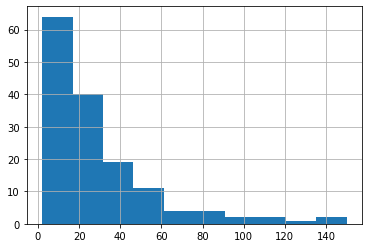

In [103]:
bollywood['Budget'].hist()

### 9. Compare the distribution of ROIs between movies with comedy genre and drama. Which genre typically sees higher ROIs?


### 10. Is there a correlation between box office collection and YouTube likes? Is the correlation positive or negative?

### 11. Which genre of movies typically sees more YouTube likes? Draw boxplots for each genre of movies to compare.


### 12. Which of the variables among Budget, BoxOfficeCollection, YoutubeView, YoutubeLikes, YoutubeDislikes are highly correlated? Note: Draw pair plot or heatmap.